In [1]:
import cv2 as cv
import os
import numpy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [2]:
############# Preprocessing ##############
sign1={}
sign2={}

def func(basePathFunc,sign,num):
    i=0
    for images in os.listdir(basePathFunc):
        if(images.endswith(".ppm")):
            img = cv.imread(basePathFunc + "/" + images)
            dsize=(32,32)
            
            # resize the image
            img = cv.resize(img, dsize)
            
            # convert to array of num
            np_img = numpy.array(img)
            
            #add to array
            np_img = np_img.flatten()
            np_img= numpy.append(num,np_img)
            sign[i]=np_img
            
            i += 1

func("./dataset/training/00053", sign1, 0)
func("./dataset/training/00022", sign2, 1)


In [3]:
############# Dataframes ##############
df1 = pd.DataFrame(sign1)
df1 = df1.T

df2 = pd.DataFrame(sign2)
df2 = df2.T

frame = [df1,df2]
df = pd.concat(frame)

# df

In [4]:
############# Splitting data ##############
X = df.drop(0,axis=1)
y = df[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [5]:
############# Logistic Regression ##############
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [6]:
############# Accuracy ##############
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

score = lr.score(X_test, y_test)
print("Logistic Regression Score :", score)

Logistic Regression model accuracy (in %): 100.0
Logistic Regression Score : 1.0


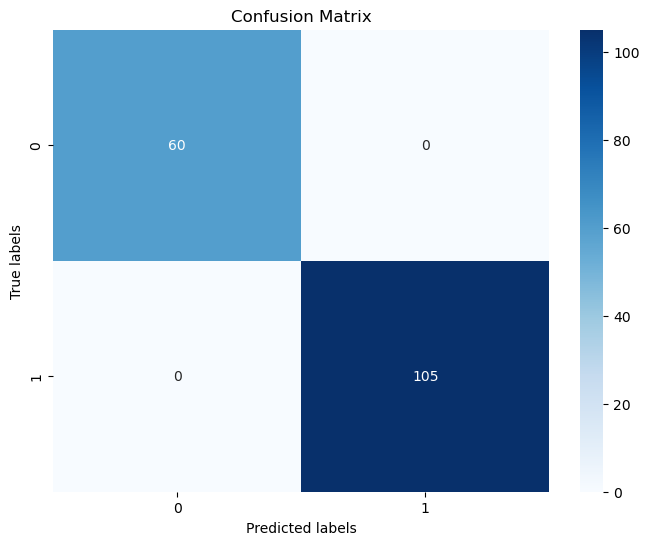

In [7]:
############# Confusion Matrix ##############
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


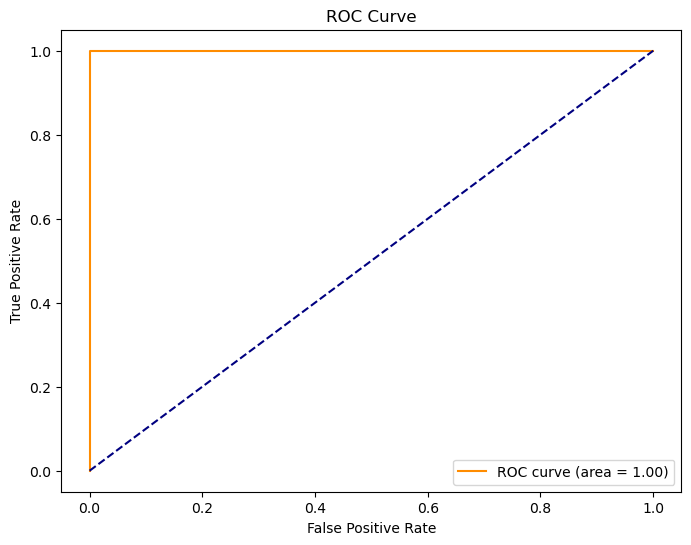

In [8]:
############# ROC Curve ##############
y_pred_proba = lr.predict_proba(X_test)

# Consider only the positive class probability
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [9]:
############# Predict Image ##############
def predict_image(image_path):
    img = cv.imread(image_path)
    dsize=(32,32)
    # resize the image
    img = cv.resize(img, dsize)
    # convert to array of num
    np_img = numpy.array(img)
    #add to array
    np_img = np_img.flatten()
    pred = pd.DataFrame(np_img)
    pred_img = pred.T
    return lr.predict(pred_img)[0]

predicted = predict_image("./dataset/testing/00022/dash_007.ppm")
print("Prediction result : ", predicted)

Prediction result :  1


In [10]:
############# Pedicting Set of images ##############
def get_images(folder_path, extension=".ppm", num_images=20):
    images = []
    # List all files in the directory
    files = os.listdir(folder_path)
    # Filter files with the specified extension
    ppm_files = [file for file in files if file.endswith(extension)]
    # Load the first 'num_images' images
    for i in range(min(num_images, len(ppm_files))):
        img_path = os.path.join(folder_path, ppm_files[i])
        images.append(img_path)
    return images

def predict_images(images_path):
    i = 0
    pred = []
    for img in images_path:
        pred_img = predict_image(img)
        pred.append(pred_img)
        i += 1
    return pred

# Get Images
images_53_paths = get_images("./dataset/testing/00053")
images_22_paths = get_images("./dataset/testing/00022")

# Test images
print("Result of 00053 images prediction :", predict_images(images_53_paths) )
print("Result of 00022 images prediction :", predict_images(images_22_paths) )

Result of 00053 images prediction : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Result of 00022 images prediction : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
